# BUFONIDAE - GBIF

## Información sobre la descarga realizada a GBIF meidante el codigo de R:

Desde R se ha realizado una descarga de datos de presencia de la familia Bufoniddae Gray, 1825 desde GBIF con el script anterior “00_Download_GBIF.R”. La información correspondiente a dicha descarga es:

**Cita:** GBIF.org (05 July 2024) GBIF Occurrence Download  https://doi.org/10.15468/dl.rjd4ty

- Conjuntos de datos implicados 4.438
- Editores implicados 503
- Países editores implicados 7

En este Notebook se realiza la limpieza de los datos descargados de GBIF, se realizará una verificación y limpieza de la taxonomia, duplicados, periodo temporal

# Información sobre la version de Python y entorno utilizado:

In [1]:
import sys
import platform

print("Python version:", platform.python_version())
print("Conda environment:", sys.prefix)

Python version: 3.12.4
Conda environment: c:\Users\molic\anaconda3\envs\Bufonidae


# Paquetes

In [2]:
import pandas as pd
import numpy as np
import openpyxl
from pygbif import species
import matplotlib.pyplot as plt
import geopandas as gpd

# Carga de datos

Previamente, los datos descargados desde GBIF se han restringuido al continente Europeo mediante el sistema de información geografica QGIS, utilizando la herramienta seleccionar por poligono.

In [3]:
df = pd.read_csv('Data/Bufonidae_EU_v0.csv')

C:\Users\molic\AppData\Local\Temp\ipykernel_26976\1530582232.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Bufonidae_EU_v0.csv')


## Visualización de los datos y su estructura:

In [4]:
df

,gbifID,family,genus,species,infraspecificEpithet,taxonRank,scientificName,countryCode,locality,stateProvince,...,decimalLongitude,coordinatePrecision,eventDate,day,month,year,occurrenceStatus,basisOfRecord,recordedBy,issue
0,2502246604,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Bufo bufo (Linnaeus, 1758)",FR,NaN,NaN,...,2.13477,NaN,2014-04-07,7.0,4.0,2014.0,PRESENT,HUMAN_OBSERVATION,Dewulf Lucile,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
1,2502246611,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Bufo bufo (Linnaeus, 1758)",FR,NaN,NaN,...,2.56825,NaN,2015-03-01,1.0,3.0,2015.0,PRESENT,HUMAN_OBSERVATION,Dewulf Lucile,CONTINENT_DERIVED_FROM_COORDINATES;FOOTPRINT_W...
2,4083393551,Bufonidae,Epidalea,Epidalea calamita,NaN,SPECIES,"Epidalea calamita (Laurenti, 1768)",FR,NaN,NaN,...,4.70202,NaN,2001-07-01,1.0,7.0,2001.0,PRESENT,HUMAN_OBSERVATION,LOMBARDINI Katia,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
3,4083143581,Bufonidae,Epidalea,Epidalea calamita,NaN,SPECIES,"Epidalea calamita (Laurenti, 1768)",FR,NaN,NaN,...,5.34080,NaN,1990-02-28,28.0,2.0,1990.0,PRESENT,HUMAN_OBSERVATION,OLIOSO Georges,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
4,4083143679,Bufonidae,Epidalea,Epidalea calamita,NaN,SPECIES,"Epidalea calamita (Laurenti, 1768)",FR,NaN,NaN,...,4.82290,NaN,2000-03-11,11.0,3.0,2000.0,PRESENT,HUMAN_OBSERVATION,LOMBARDINI Katia;OLIVIER Anthony,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701260,3489805629,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Bufo bufo (Linnaeus, 1758)",FR,NaN,NaN,...,-1.10805,NaN,2013-07-26,26.0,7.0,2013.0,PRESENT,HUMAN_OBSERVATION,adev environnement,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
701261,4086187318,Bufonidae,Epidalea,Epidalea calamita,NaN,SPECIES,"Epidalea calamita (Laurenti, 1768)",FR,NaN,NaN,...,5.14178,NaN,2020-03-26,26.0,3.0,2020.0,PRESENT,HUMAN_OBSERVATION,JAFFRE Jonathan,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
701262,4086187322,Bufonidae,Epidalea,Epidalea calamita,NaN,SPECIES,"Epidalea calamita (Laurenti, 1768)",FR,NaN,NaN,...,5.14178,NaN,2020-04-22,22.0,4.0,2020.0,PRESENT,HUMAN_OBSERVATION,DURAND Guy,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
701263,4086187344,Bufonidae,Epidalea,Epidalea calamita,NaN,SPECIES,"Epidalea calamita (Laurenti, 1768)",FR,NaN,NaN,...,5.14178,NaN,2020-04-22,22.0,4.0,2020.0,PRESENT,HUMAN_OBSERVATION,DURAND Guy,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...


Se observa que hay 701265 registros y 21 columnas en el dataframe

In [5]:
print(df.dtypes)

gbifID                    int64
family                   object
genus                    object
species                  object
infraspecificEpithet     object
taxonRank                object
scientificName           object
countryCode              object
locality                 object
stateProvince            object
decimalLatitude         float64
decimalLongitude        float64
coordinatePrecision     float64
eventDate                object
day                     float64
month                   float64
year                    float64
occurrenceStatus         object
basisOfRecord            object
recordedBy               object
issue                    object
dtype: object


### Fuente de los datos - 'basisOfRecord' - Filtro previo

En GBIF (Global Biodiversity Information Facility), la variable "basisOfRecord" se refiere al campo que indica la naturaleza de la fuente original de los datos de ocurrencia de una especie en particular. Permite entender el tipo de información disponible sobre una observación específica de biodiversidad. Algunos de los valores comunes que puede tomar el campo "basisOfRecord" en GBIF incluyen:

- **PreservedSpecimen**: Indica que la información proviene de un espécimen preservado, como en un museo o una colección científica.

- **FossilSpecimen**: Se utiliza cuando la observación proviene de un fósil.

- **LivingSpecimen**: Cuando la observación proviene de un organismo vivo en la naturaleza.

- **HumanObservation**: Indica que la observación fue realizada por un observador humano directamente en el campo.

- **MachineObservation**: Indica que la observación fue realizada automáticamente por un dispositivo o máquina, como sensores remotos o dispositivos de monitoreo automatizado.

- **MaterialSample**: Se refiere a muestras de material biológico que pueden ser usadas para análisis posteriores.

- **occurrence**: Ocurrencia general de una especie en un lugar y tiempo determinado

In [6]:
df['basisOfRecord'].unique()

array(['HUMAN_OBSERVATION', 'PRESERVED_SPECIMEN', 'MATERIAL_CITATION',
       'OCCURRENCE', 'LIVING_SPECIMEN', 'OBSERVATION', 'MATERIAL_SAMPLE',
       'MACHINE_OBSERVATION', 'FOSSIL_SPECIMEN'], dtype=object)

In [7]:
df['basisOfRecord'].value_counts()

basisOfRecord
HUMAN_OBSERVATION      687401
PRESERVED_SPECIMEN       5475
OCCURRENCE               4231
MATERIAL_CITATION        2872
OBSERVATION              1101
MACHINE_OBSERVATION       103
MATERIAL_SAMPLE            77
FOSSIL_SPECIMEN             3
LIVING_SPECIMEN             2
Name: count, dtype: int64

Se eliminaran las siguientes fuentes de datos ya que para el estudio actual de la distribucion de especies no es relevante:

- **FossilSpecimen**
- **Material_Ctation**

In [8]:
df = df[(df['basisOfRecord'] != 'FOSSIL_SPECIMEN') & 
        (df['basisOfRecord'] != 'MATERIAL_CITATION')& 
        (df['basisOfRecord'] != 'PRESERVED_SPECIMEN')
        ]

In [9]:
df.shape[0]

692915

In [10]:
701265 - 692915

8350

Con el primer filtro previo a la limpieza se han eliminado 2875 registros que no tenian una fuente de datos apropiada para este estudio

# Verificación taxonómica

En este apartado se realizará una limpieza taxonomica de los datos, es decir, se analizará si el registro de presencia esta identificado en un rango taxonómico adecuado.

In [11]:
df['taxonRank'].unique()

array(['SPECIES', 'GENUS', 'SUBSPECIES', 'FAMILY', 'UNRANKED'],
      dtype=object)

In [12]:
df['taxonRank'].value_counts()

taxonRank
SPECIES       664477
SUBSPECIES     15160
GENUS          12830
FAMILY           393
UNRANKED          55
Name: count, dtype: int64

## Filtrar por rango taxonomico correcto

In [13]:
df = df[(df['taxonRank'] == 'SPECIES') |
        (df['taxonRank'] == 'SUBSPECIES')]

In [14]:
df.shape[0]

679637

In [15]:
692915 - 679637

13278

Se han eliminado 13278 registros al filtrar por el rango taxonómico correcto

## Listado taxonomico valido

Se utilizará el listado taxonómica de especies revisada por Speybroeck et al (2020) para el continente Europeo, teniendo en cuenta la familia *Bufonidae*, para realizar la revisión taxonomica de las especies.

El listado revisado de especies europeas para la familia *Bufonidae (Gray, 1825)* es el siguiente:

In [16]:
europa_list = pd.read_excel('List_Speybroeck_2020.xlsx')
europa_list

,family,genus,species,S_Name,name
0,Bufonidae,Bufo,Bufo bufo,"Bufo bufo (Linnaeus, 1758)",Common Toad
1,Bufonidae,Bufo,Bufo spinosus,"Bufo spinosus (Daudin, 1803)",Spiny Toad
2,Bufonidae,Bufotes,Bufotes boulengeri,"Bufotes boulengeri (Lataste, 1879)",African Green Toad
3,Bufonidae,Bufotes,Bufotes cypriensis,"Bufotes cypriensis (Litvinchuk, Mazepa, Jablon...",Cyprus Green Toad
4,Bufonidae,Bufotes,Bufotes viridis,"Bufotes viridis (Laurenti, 1768)",Green Toad
5,Bufonidae,Epidalea,Epidalea calamita,"Epidalea calamita (Laurenti, 1768)",Natterjack Toad


En el listado taxonomico revisado se observa que hay 3 generos de especies europeas en la familia. Segun esta revision hay un total de 6 especies europeas.

In [17]:
df['genus'].value_counts()

genus
Bufo           518099
Epidalea       139154
Bufotes         22302
Sclerophrys        79
Rhinella            3
Name: count, dtype: int64

En el df se observa que hay 5 generos diferentes, dos de los cuales (Sclerophrys y Rhinella) no estan presentes en el listado taxonómica de especies revisada por Speybroeck et al (2020). Por consiguiente Se filtrará el df con los tres generos europeos antes de validar taxonomicamente los nombres cientificos de las especies.

In [18]:
df.shape[0]

679637

In [19]:
df = df[(df['genus'] == 'Bufo') |
        (df['genus'] == 'Bufotes') |
        (df['genus'] == 'Epidalea')]

df.shape[0]

679555

In [20]:
679637 - 679555

82

Al filtrar solo los generos europeos se han eliminado 148 registros.

## Creación de una lista taxonónica

    A continuación se crea una lista taxonómica a partir de los campos relacionados con la taxonomia, para obtener un listado con los nombres cientificos de las distintas especies que figuran en el dataset, para posteriormente hacer una comparación el listado taxonómico valido.

In [21]:
df.columns

Index(['gbifID', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'countryCode', 'locality',
       'stateProvince', 'decimalLatitude', 'decimalLongitude',
       'coordinatePrecision', 'eventDate', 'day', 'month', 'year',
       'occurrenceStatus', 'basisOfRecord', 'recordedBy', 'issue'],
      dtype='object')

In [22]:
# Seleccionar las columnas relevantes del DataFrame que contienen información taxonómica
checklist = df[['family', 'genus', 'species', 'infraspecificEpithet', 'taxonRank', 'scientificName']]

# Eliminar las entradas duplicadas en el DataFrame 'checklist'
checklist = checklist.drop_duplicates()

# Escribir el DataFrame 'checklist' en un archivo CSV llamado 'checklist.csv'
#checklist.to_csv('01_PREPROCESADO/checklist.csv', sep='\t', index=False)

In [23]:
checklist

,family,genus,species,infraspecificEpithet,taxonRank,scientificName
0,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Bufo bufo (Linnaeus, 1758)"
2,Bufonidae,Epidalea,Epidalea calamita,NaN,SPECIES,"Epidalea calamita (Laurenti, 1768)"
169,Bufonidae,Bufo,Bufo spinosus,NaN,SPECIES,"Bufo spinosus Daudin, 1803"
683,Bufonidae,Bufotes,Bufotes viridis,balearicus,SUBSPECIES,"Bufotes viridis balearicus (Boettger, 1880)"
690,Bufonidae,Bufo,Bufo verrucosissimus,NaN,SPECIES,"Bufo verrucosissimus (Pallas, 1814)"
704,Bufonidae,Bufotes,Bufotes viridis,viridis,SUBSPECIES,Bufotes viridis viridis
707,Bufonidae,Bufotes,Bufotes viridis,NaN,SPECIES,"Bufotes viridis (Laurenti, 1768)"
810,Bufonidae,Bufotes,Bufotes cypriensis,NaN,SPECIES,"Bufotes cypriensis Litvinchuk, Mazepa, Jablons..."
1788,Bufonidae,Epidalea,Epidalea calamita,NaN,SPECIES,"Bufo calamita Laurenti, 1768"
1793,Bufonidae,Bufotes,Bufotes viridis,NaN,SPECIES,"Bufo viridis Laurenti, 1768"


In [24]:
checklist.shape[0]

25

In [25]:
# Conteo de cuántas especies hay por familia y género
especies_genero = checklist.groupby(['genus'])['species'].nunique().reset_index(name='count_especies')
especies_genero = especies_genero.sort_values(by='count_especies', ascending=False)

print("\nConteo de especies por familia y género:")
print(especies_genero)


Conteo de especies por familia y género:
      genus  count_especies
1   Bufotes               6
0      Bufo               4
2  Epidalea               1


In [26]:
df['species'].unique()

array(['Bufo bufo', 'Epidalea calamita', 'Bufo spinosus',
       'Bufotes viridis', 'Bufo verrucosissimus', 'Bufotes cypriensis',
       'Bufotes siculus', 'Bufotes boulengeri', 'Bufotes variabilis',
       'Bufotes balearicus', 'Bufo japonicus'], dtype=object)

In [27]:
df['species'].nunique()

11

Se puede observar que en el df hay un número mayor de especies (11) que el listado revisado (6).

Número de especies en la cehcklist, es decir, aquellas que tengan 'taxonRank' como 'SPECIES':

In [28]:
species_checklist = checklist[(checklist['taxonRank'] == 'SPECIES')]
species_checklist

,family,genus,species,infraspecificEpithet,taxonRank,scientificName
0,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Bufo bufo (Linnaeus, 1758)"
2,Bufonidae,Epidalea,Epidalea calamita,NaN,SPECIES,"Epidalea calamita (Laurenti, 1768)"
169,Bufonidae,Bufo,Bufo spinosus,NaN,SPECIES,"Bufo spinosus Daudin, 1803"
690,Bufonidae,Bufo,Bufo verrucosissimus,NaN,SPECIES,"Bufo verrucosissimus (Pallas, 1814)"
707,Bufonidae,Bufotes,Bufotes viridis,NaN,SPECIES,"Bufotes viridis (Laurenti, 1768)"
810,Bufonidae,Bufotes,Bufotes cypriensis,NaN,SPECIES,"Bufotes cypriensis Litvinchuk, Mazepa, Jablons..."
1788,Bufonidae,Epidalea,Epidalea calamita,NaN,SPECIES,"Bufo calamita Laurenti, 1768"
1793,Bufonidae,Bufotes,Bufotes viridis,NaN,SPECIES,"Bufo viridis Laurenti, 1768"
14759,Bufonidae,Bufotes,Bufotes boulengeri,NaN,SPECIES,"Bufotes boulengeri (Lataste, 1879)"
22610,Bufonidae,Bufotes,Bufotes variabilis,NaN,SPECIES,"Pseudepidalea variabilis (Pallas, 1769)"


In [29]:
species_checklist.shape[0]

17

### Procesamiento y estandarización de la 'species_checklist'

Se pretenden añadir información adicional del backbone taxon de GBIF correspondiente a los nombres científicos presentes en el DataFrame 'species_checklist'.

El "backbone taxon" de GBIF es una taxonomía jerárquica que proporciona una referencia estándar para los nombres científicos de las especies y sus relaciones taxonómicas.
La función *species.name_backbone()* se utiliza para obtener información detallada sobre un nombre científico desde el "backbone taxon" de GBIF

In [30]:
species_checklist.reset_index(drop=True, inplace=True)

# Crear una lista de nombres científicos únicos
lista_nombres = species_checklist['scientificName'].unique()
lista_nombres

array(['Bufo bufo (Linnaeus, 1758)', 'Epidalea calamita (Laurenti, 1768)',
       'Bufo spinosus Daudin, 1803',
       'Bufo verrucosissimus (Pallas, 1814)',
       'Bufotes viridis (Laurenti, 1768)',
       'Bufotes cypriensis Litvinchuk, Mazepa, Jablonski & Dufresnes, 2019',
       'Bufo calamita Laurenti, 1768', 'Bufo viridis Laurenti, 1768',
       'Bufotes boulengeri (Lataste, 1879)',
       'Pseudepidalea variabilis (Pallas, 1769)',
       'Pseudepidalea viridis (Laurenti, 1768)',
       'Bufotes balearicus (Boettger, 1880)',
       'Bufotes variabilis (Pallas, 1769)', 'Rana bufo Linnaeus, 1758',
       'Bufo japonicus Temminck & Schlegel, 1838',
       'Rana rubeta Linnaeus, 1758', 'Rana vulgaris (Laurenti, 1768)'],
      dtype=object)

In [31]:
# Inicializar listas para almacenar los datos del backbone taxon de GBIF
status = []
match_type = []
species_gbif = []

# Iterar sobre cada nombre científico único
for nombre in lista_nombres:
    try:
        # Obtener información del backbone taxon de GBIF para el nombre científico
        info_gbif = species.name_backbone(name=nombre)
        
        # Extraer los datos relevantes y agregarlos a las listas
        status.append(info_gbif['status'])
        match_type.append(info_gbif['matchType'])
        
        # Manejar el caso en el que 'species' no esté presente en el resultado
        species_value = info_gbif.get('species', 'N/A')
        species_gbif.append(species_value)
    except Exception as e:
        # Si hay un error al obtener la información, imprimirlo y continuar con el siguiente nombre
        print(f"Error al obtener información de GBIF para '{nombre}': {e}")

# Crear un DataFrame con los datos del backbone taxon de GBIF
gbif_stand = pd.DataFrame({'gbif_status': status, 'gbif_matchType': match_type, 'gbif_species': species_gbif})


gbif_stand.reset_index(drop=True, inplace=True)

# Concatenar el DataFrame 'checklist' y el DataFrame 'gbif_stand' horizontalmente
species_checklist_v2 = pd.concat([species_checklist, gbif_stand], axis=1)

In [32]:
# Contar los valores NaN por columna
species_checklist_v2_num_nans = species_checklist_v2.isna().sum()
species_checklist_v2_num_nans

family                   0
genus                    0
species                  0
infraspecificEpithet    17
taxonRank                0
scientificName           0
gbif_status              0
gbif_matchType           0
gbif_species             0
dtype: int64

In [33]:
list_gbif_status = species_checklist_v2['gbif_status'].unique()
list_gbif_status

array(['ACCEPTED', 'SYNONYM'], dtype=object)

Se seleccionan solo los nombres cientificos que estan etiquetados como 'ACCEPTED' o 'SYNONYM', que en este caso son todos los registros.

In [34]:
species_checklist_v2 = species_checklist_v2[(species_checklist_v2['gbif_status']=='ACCEPTED')|
                                            (species_checklist_v2['gbif_status']=='SYNONYM')]

In [35]:
species_checklist_v2.shape[0] #Solo con 'gbif_status' == 'ACCEPTED' & 'SYNONYM'

17

In [36]:
species_checklist_v2 = species_checklist_v2.sort_values(['family', 'genus', 'species'])
species_checklist_v2

,family,genus,species,infraspecificEpithet,taxonRank,scientificName,gbif_status,gbif_matchType,gbif_species
0,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Bufo bufo (Linnaeus, 1758)",ACCEPTED,EXACT,Bufo bufo
13,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Rana bufo Linnaeus, 1758",SYNONYM,EXACT,Bufo bufo
15,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Rana rubeta Linnaeus, 1758",SYNONYM,EXACT,Bufo bufo
16,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Rana vulgaris (Laurenti, 1768)",SYNONYM,EXACT,Bufo bufo
14,Bufonidae,Bufo,Bufo japonicus,NaN,SPECIES,"Bufo japonicus Temminck & Schlegel, 1838",ACCEPTED,EXACT,Bufo japonicus
2,Bufonidae,Bufo,Bufo spinosus,NaN,SPECIES,"Bufo spinosus Daudin, 1803",ACCEPTED,EXACT,Bufo spinosus
3,Bufonidae,Bufo,Bufo verrucosissimus,NaN,SPECIES,"Bufo verrucosissimus (Pallas, 1814)",ACCEPTED,EXACT,Bufo verrucosissimus
11,Bufonidae,Bufotes,Bufotes balearicus,NaN,SPECIES,"Bufotes balearicus (Boettger, 1880)",ACCEPTED,EXACT,Bufotes balearicus
8,Bufonidae,Bufotes,Bufotes boulengeri,NaN,SPECIES,"Bufotes boulengeri (Lataste, 1879)",ACCEPTED,EXACT,Bufotes boulengeri
5,Bufonidae,Bufotes,Bufotes cypriensis,NaN,SPECIES,"Bufotes cypriensis Litvinchuk, Mazepa, Jablons...",ACCEPTED,EXACT,Bufotes cypriensis


In [37]:
species_checklist_v2.shape[0]

17

Como se ha mencionado previamente, en el listado de nombres cientificos unicos relacionados con los aceptados o sinonimos de GBIF, se observa un mayor numero de especies respecto al listado propuesto por Speybroeck et al (2020) para las especies europeas de Bufonidae. El listado de Speybroeck consta de 6 especies, mientras que el listado de nombres taxonomicos revisado a partir de la red troncal de GBIF consta de 17 nombres cientificos. No obstante, a simplevista puede observarse como algunas especies constan de mas de un nombre cientifico asignado, principalmente por ser clasificadas como sinonimos o erratas en la escritura.

Por ejemplo, para la especie '*Bufo bufo* (Linnaeus, 1758)' se observan varios registros con diferente nombre cienitifico y estado de GBIF. Esta el registro del nombre cientifico aceptado '*Bufo bufo* (Linnaeus, 1758)' y registros correspondientes a distintos sinonimos.

Para solucionar estos errores taxonomicos, se realizará una revisión manual del listado revisado con la red troncal de GBIF,"species_checklist_v2", respecto al listado taxonomico de Speybroeck et al (2020).

In [38]:
#species_checklist_v2.to_csv('01_PREPROCESADO/species_checklist_v2.csv', index=False, encoding='utf-8-sig')

### Correción de registros taxonomicos erroneos

Tras realizar una revisión manual de los listados, se ha observado que algunas especies aceptadas por GBIF no son realmente especies.

Como resultado de la revisión taxonomica se ha desarollado una tabla en la cual figuran los nombres de las especies que deben ser modificados y corregidos por el nombre que realmente les corresponde.

In [39]:
sp = [ 'Bufotes balearicus', 'Bufotes variabilis', 'Bufotes sitibundus']
corrections = [ 'Bufotes viridis', 'Bufotes viridis','Bufotes viridis']
reason = ['Subspecies of B. viridis', 'Subspecies of B. viridis', 'Subspecies of B. viridis']

taxonomic_corrections = pd.DataFrame({'Species': sp, 'Corrections': corrections, 'Reason': reason})
taxonomic_corrections

,Species,Corrections,Reason
0,Bufotes balearicus,Bufotes viridis,Subspecies of B. viridis
1,Bufotes variabilis,Bufotes viridis,Subspecies of B. viridis
2,Bufotes sitibundus,Bufotes viridis,Subspecies of B. viridis


In [40]:
# Filtrar el DataFrame original para seleccionar solo las filas que contienen las especies que necesitas corregir
filtered_df = df[df['species'].isin(taxonomic_corrections['Species'])]

filtered_df.head(2)

,gbifID,family,genus,species,infraspecificEpithet,taxonRank,scientificName,countryCode,locality,stateProvince,...,decimalLongitude,coordinatePrecision,eventDate,day,month,year,occurrenceStatus,basisOfRecord,recordedBy,issue
22610,2329622469,Bufonidae,Bufotes,Bufotes variabilis,NaN,SPECIES,"Pseudepidalea variabilis (Pallas, 1769)",GE,UTM50_38T_0450_4700,NaN,...,44.639481,NaN,2011-05-10T00:00,10.0,5.0,2011.0,PRESENT,HUMAN_OBSERVATION,-1360999102,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
37613,3073358971,Bufonidae,Bufotes,Bufotes balearicus,balearicus,SUBSPECIES,"Bufo viridis balearicus Boettger, 1880",FR,NaN,France métropolitaine,...,9.115630,NaN,1992,NaN,NaN,1992.0,PRESENT,HUMAN_OBSERVATION,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...


In [41]:
filtered_df.tail(2)

,gbifID,family,genus,species,infraspecificEpithet,taxonRank,scientificName,countryCode,locality,stateProvince,...,decimalLongitude,coordinatePrecision,eventDate,day,month,year,occurrenceStatus,basisOfRecord,recordedBy,issue
699512,3992555429,Bufonidae,Bufotes,Bufotes balearicus,balearicus,SUBSPECIES,"Bufo viridis balearicus Boettger, 1880",FR,NaN,NaN,...,9.45561,NaN,2019-05-22,22.0,5.0,2019.0,PRESENT,HUMAN_OBSERVATION,LEPORI Ludovic,CONTINENT_DERIVED_FROM_COORDINATES;FOOTPRINT_W...
699513,3992555440,Bufonidae,Bufotes,Bufotes balearicus,balearicus,SUBSPECIES,"Bufo viridis balearicus Boettger, 1880",FR,NaN,NaN,...,9.44100,NaN,2019-05-22,22.0,5.0,2019.0,PRESENT,HUMAN_OBSERVATION,LEPORI Ludovic,CONTINENT_DERIVED_FROM_COORDINATES;FOOTPRINT_W...


In [42]:
filtered_df.shape[0]

833

In [43]:
corrected_df = filtered_df.copy()

# Iterar sobre las filas de corrections_df
for index, row in taxonomic_corrections.iterrows():
    original_species = row['Species']
    corrected_species = row['Corrections']
    
    # Cambia los valores en df donde 'Species' sea igual a original_species creado a partir de la columna 'Species' del taxonomic_corrections
    corrected_df.loc[corrected_df['species'] == original_species, 'species'] = corrected_species

corrected_df.head(2)

,gbifID,family,genus,species,infraspecificEpithet,taxonRank,scientificName,countryCode,locality,stateProvince,...,decimalLongitude,coordinatePrecision,eventDate,day,month,year,occurrenceStatus,basisOfRecord,recordedBy,issue
22610,2329622469,Bufonidae,Bufotes,Bufotes viridis,NaN,SPECIES,"Pseudepidalea variabilis (Pallas, 1769)",GE,UTM50_38T_0450_4700,NaN,...,44.639481,NaN,2011-05-10T00:00,10.0,5.0,2011.0,PRESENT,HUMAN_OBSERVATION,-1360999102,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
37613,3073358971,Bufonidae,Bufotes,Bufotes viridis,balearicus,SUBSPECIES,"Bufo viridis balearicus Boettger, 1880",FR,NaN,France métropolitaine,...,9.115630,NaN,1992,NaN,NaN,1992.0,PRESENT,HUMAN_OBSERVATION,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...


In [44]:
corrected_df.tail(2)

,gbifID,family,genus,species,infraspecificEpithet,taxonRank,scientificName,countryCode,locality,stateProvince,...,decimalLongitude,coordinatePrecision,eventDate,day,month,year,occurrenceStatus,basisOfRecord,recordedBy,issue
699512,3992555429,Bufonidae,Bufotes,Bufotes viridis,balearicus,SUBSPECIES,"Bufo viridis balearicus Boettger, 1880",FR,NaN,NaN,...,9.45561,NaN,2019-05-22,22.0,5.0,2019.0,PRESENT,HUMAN_OBSERVATION,LEPORI Ludovic,CONTINENT_DERIVED_FROM_COORDINATES;FOOTPRINT_W...
699513,3992555440,Bufonidae,Bufotes,Bufotes viridis,balearicus,SUBSPECIES,"Bufo viridis balearicus Boettger, 1880",FR,NaN,NaN,...,9.44100,NaN,2019-05-22,22.0,5.0,2019.0,PRESENT,HUMAN_OBSERVATION,LEPORI Ludovic,CONTINENT_DERIVED_FROM_COORDINATES;FOOTPRINT_W...


In [45]:
corrected_df.shape[0]

833

El cambio se ha realizado corrctamente, por lo que se procede a realizar el cmabio en el dataframe original.

In [46]:
# Iterar sobre las filas de corrections_df
for index, row in taxonomic_corrections.iterrows():
    original_species = row['Species']
    corrected_species = row['Corrections']
    
    # Cambia los valores en df donde 'Species' sea igual a original_species creado a partir de la columna 'Species' del taxonomic_corrections
    df.loc[df['species'] == original_species, 'species'] = corrected_species

## Selección de especies europeas

A continuación se carga el listado taxonómica de especies revisada por Speybroeck et al (2020) para el continente Europeo. Según esta lista, hay 6 especies europeas, que seran con las que se trabajará en este estudio.

In [47]:
merged_df = pd.merge(species_checklist_v2, europa_list, on='species', how='inner')
merged_df.head()

,family_x,genus_x,species,infraspecificEpithet,taxonRank,scientificName,gbif_status,gbif_matchType,gbif_species,family_y,genus_y,S_Name,name
0,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Bufo bufo (Linnaeus, 1758)",ACCEPTED,EXACT,Bufo bufo,Bufonidae,Bufo,"Bufo bufo (Linnaeus, 1758)",Common Toad
1,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Rana bufo Linnaeus, 1758",SYNONYM,EXACT,Bufo bufo,Bufonidae,Bufo,"Bufo bufo (Linnaeus, 1758)",Common Toad
2,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Rana rubeta Linnaeus, 1758",SYNONYM,EXACT,Bufo bufo,Bufonidae,Bufo,"Bufo bufo (Linnaeus, 1758)",Common Toad
3,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Rana vulgaris (Laurenti, 1768)",SYNONYM,EXACT,Bufo bufo,Bufonidae,Bufo,"Bufo bufo (Linnaeus, 1758)",Common Toad
4,Bufonidae,Bufo,Bufo spinosus,NaN,SPECIES,"Bufo spinosus Daudin, 1803",ACCEPTED,EXACT,Bufo spinosus,Bufonidae,Bufo,"Bufo spinosus (Daudin, 1803)",Spiny Toad


In [48]:
merged_df.columns

Index(['family_x', 'genus_x', 'species', 'infraspecificEpithet', 'taxonRank',
       'scientificName', 'gbif_status', 'gbif_matchType', 'gbif_species',
       'family_y', 'genus_y', 'S_Name', 'name'],
      dtype='object')

In [49]:
columns_select = ('family_x', 'genus_x', 'species', 'scientificName','S_Name', 'gbif_status', 'name')

# Selecciona solo las columnas especificadas en la lista columns_select
merged_df = merged_df[list(columns_select)]

# Renombrar las columnas 'family_x' y 'genus_x' a 'FAMILY' y 'GENUS' respectivamente
merged_df = merged_df.rename(columns={'family_x': 'FAMILY', 'genus_x': 'GENUS', 'S_Name':'S_NAME'})
merged_df.head()

,FAMILY,GENUS,species,scientificName,S_NAME,gbif_status,name
0,Bufonidae,Bufo,Bufo bufo,"Bufo bufo (Linnaeus, 1758)","Bufo bufo (Linnaeus, 1758)",ACCEPTED,Common Toad
1,Bufonidae,Bufo,Bufo bufo,"Rana bufo Linnaeus, 1758","Bufo bufo (Linnaeus, 1758)",SYNONYM,Common Toad
2,Bufonidae,Bufo,Bufo bufo,"Rana rubeta Linnaeus, 1758","Bufo bufo (Linnaeus, 1758)",SYNONYM,Common Toad
3,Bufonidae,Bufo,Bufo bufo,"Rana vulgaris (Laurenti, 1768)","Bufo bufo (Linnaeus, 1758)",SYNONYM,Common Toad
4,Bufonidae,Bufo,Bufo spinosus,"Bufo spinosus Daudin, 1803","Bufo spinosus (Daudin, 1803)",ACCEPTED,Spiny Toad


In [50]:
len(merged_df)

12

In [51]:
merged_df['species'].nunique()

6

Se observa que estan presentes las 6 especies europeas.

In [52]:
columns_select = ('FAMILY', 'GENUS', 'species', 'S_NAME', 'name')
cheklist_revised = merged_df[list(columns_select)].copy().drop_duplicates()
cheklist_revised

,FAMILY,GENUS,species,S_NAME,name
0,Bufonidae,Bufo,Bufo bufo,"Bufo bufo (Linnaeus, 1758)",Common Toad
4,Bufonidae,Bufo,Bufo spinosus,"Bufo spinosus (Daudin, 1803)",Spiny Toad
5,Bufonidae,Bufotes,Bufotes boulengeri,"Bufotes boulengeri (Lataste, 1879)",African Green Toad
6,Bufonidae,Bufotes,Bufotes cypriensis,"Bufotes cypriensis (Litvinchuk, Mazepa, Jablon...",Cyprus Green Toad
7,Bufonidae,Bufotes,Bufotes viridis,"Bufotes viridis (Laurenti, 1768)",Green Toad
10,Bufonidae,Epidalea,Epidalea calamita,"Epidalea calamita (Laurenti, 1768)",Natterjack Toad


In [53]:
#cheklist_revised.to_csv('01_PREPROCESADO/Listado_revisado_final.csv', index=False, encoding='utf-8-sig')

## Seleccionar registros correspondientes a las 6 especies revisadas

In [54]:
print('Número de registros presentes en el dataframe de presencias, antes de la selección:', len(df))

Número de registros presentes en el dataframe de presencias, antes de la selección: 679555


In [55]:
df_bufoniade = pd.merge(df, cheklist_revised, on='species', how='inner')
df_bufoniade.head(2)

,gbifID,family,genus,species,infraspecificEpithet,taxonRank,scientificName,countryCode,locality,stateProvince,...,month,year,occurrenceStatus,basisOfRecord,recordedBy,issue,FAMILY,GENUS,S_NAME,name
0,2502246604,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Bufo bufo (Linnaeus, 1758)",FR,NaN,NaN,...,4.0,2014.0,PRESENT,HUMAN_OBSERVATION,Dewulf Lucile,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...,Bufonidae,Bufo,"Bufo bufo (Linnaeus, 1758)",Common Toad
1,2502246611,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Bufo bufo (Linnaeus, 1758)",FR,NaN,NaN,...,3.0,2015.0,PRESENT,HUMAN_OBSERVATION,Dewulf Lucile,CONTINENT_DERIVED_FROM_COORDINATES;FOOTPRINT_W...,Bufonidae,Bufo,"Bufo bufo (Linnaeus, 1758)",Common Toad


In [56]:
df_bufoniade.columns

Index(['gbifID', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'countryCode', 'locality',
       'stateProvince', 'decimalLatitude', 'decimalLongitude',
       'coordinatePrecision', 'eventDate', 'day', 'month', 'year',
       'occurrenceStatus', 'basisOfRecord', 'recordedBy', 'issue', 'FAMILY',
       'GENUS', 'S_NAME', 'name'],
      dtype='object')

In [57]:
df_bufoniade['species'].nunique()

6

In [58]:
print('Número de registros presentes en el dataframe de presencias de anuros, antes de la selección:', len(df))
print('Número de registros presentes en el dataframe de presencias de anuros, tras de la selección:', len(df_bufoniade))
antes = len(df)
despues = len(df_bufoniade)
dif = antes-despues
print('Número total de registros descartados:', dif)

Número de registros presentes en el dataframe de presencias de anuros, antes de la selección: 679555
Número de registros presentes en el dataframe de presencias de anuros, tras de la selección: 678937
Número total de registros descartados: 618


In [59]:
campos = ('gbifID', 'FAMILY', 'GENUS', 'species', 
          'infraspecificEpithet', 'taxonRank', 'S_NAME', 'name',
          'countryCode', 'locality', 'stateProvince', 'decimalLatitude',
          'decimalLongitude', 'coordinatePrecision', 'eventDate', 'day', 'month', 'year',
          'occurrenceStatus', 'basisOfRecord', 'recordedBy', 'issue')

In [60]:
df_bufoniade = df_bufoniade[list(campos)]

In [61]:
df_bufoniade.to_csv('01_PREPROCESADO/df_bufoniade_tax_ok.csv', index=False, encoding='utf-8-sig')


# Validación coordenadas geográficas (2)

In [62]:
# Función para contar decimales
def count_dec(valor):
    if isinstance(valor, float):
        partes = str(abs(valor)).split('.')
        if len(partes) > 1:
            return len(partes[1]) #selecciona la len de la segunda parte (tras el punto)
        else:
            return 0
    else:
        return 0
#str() convierte este valor numérico en una cadena de caracteres.
#split('.'): divide la cadena en dos partes en el punto decimal (.)

# Aplicar la función a cada valor de las coordenadas y obtener el máximo

max_dec_lat = df_bufoniade['decimalLatitude'].apply(count_dec).max()
max_dec_lon = df_bufoniade['decimalLongitude'].apply(count_dec).max()

print("Máximo número de decimales en decimalLat:", max_dec_lat)
print("Máximo número de decimales en decimalLon:", max_dec_lon)

min_dec_lat = df_bufoniade['decimalLatitude'].apply(count_dec).min()
min_dec_lon = df_bufoniade['decimalLongitude'].apply(count_dec).min()

print("Mínimo número de decimales en decimalLat:", min_dec_lat)
print("Mínimo número de decimales en decimalLon:", min_dec_lon)

Máximo número de decimales en decimalLat: 6
Máximo número de decimales en decimalLon: 6
Mínimo número de decimales en decimalLat: 1
Mínimo número de decimales en decimalLon: 0


In [63]:
# Agregar las nuevas columnas al DataFrame
df_bufoniade['len_dec_lat'] = df_bufoniade['decimalLatitude'].apply(count_dec)
df_bufoniade['len_dec_lon'] = df_bufoniade['decimalLongitude'].apply(count_dec)

In [64]:
# Filtrar los registros que tengan más de 1 decimal en ambos campos
df_bufoniade_coord = df_bufoniade.loc[(df_bufoniade['len_dec_lat'] > 1) & (df_bufoniade['len_dec_lon'] > 1)]

In [65]:
print('Número de registros presentes en el dataframe de presencias de anuros, antes de la selección:', len(df_bufoniade))
print('Número de registros presentes en el dataframe de presencias de anuros, tras de la selección:', len(df_bufoniade_coord))
antes = len(df_bufoniade)
despues = len(df_bufoniade_coord)
dif = antes-despues
print('Número total de registros descartados:', dif)

Número de registros presentes en el dataframe de presencias de anuros, antes de la selección: 678937
Número de registros presentes en el dataframe de presencias de anuros, tras de la selección: 585190
Número total de registros descartados: 93747


# Filtros temporales

Se filtraran aquellos registros que al menos tengan informacion para año y mes. Si no hay informacion de fecha se aislaran en un dataframe diferente, para evaluar si se puede conseguir la fehca a partir del campo 'eventday'.

A continuación se crean dos df, uno con valores nulos en algunos de los campos 'day', 'month', 'year' y otro sin valores nulos.

In [66]:
records_year = df_bufoniade_coord.groupby('year').size().reset_index(name='records')

In [67]:
records_year.head()

,year,records
0,1600.0,2
1,1785.0,1
2,1800.0,1
3,1801.0,1
4,1802.0,1


In [68]:
# Filtrar los registros que tienen algún valor nulo en alguna de las columnas
df_with_nulls = df_bufoniade_coord[df_bufoniade_coord[['month', 'year']].isna().any(axis=1)]

# Filtrar los registros que no tienen valores nulos en ninguna de las columnas
df_without_nulls = df_bufoniade_coord[~df_bufoniade_coord[['month', 'year']].isna().any(axis=1)]

Nos interesan los registros que tengan informacion para el mes y el año, el dia en este caso no se tendra en cuenta.

In [69]:
print('Número de registros presentes en el dataframe antes de eliminar valores nulos en la fecha:', len(df_bufoniade_coord))
print('Número de registros presentes en el dataframe con valores nulos:', len(df_with_nulls))
print('Número de registros presentes en el dataframe sin valores nulos:', len(df_without_nulls))

antes = len(df_bufoniade_coord)
despues = len(df_without_nulls)
dif = antes-despues
print('Número total de registros descartados:', dif)

Número de registros presentes en el dataframe antes de eliminar valores nulos en la fecha: 585190
Número de registros presentes en el dataframe con valores nulos: 87386
Número de registros presentes en el dataframe sin valores nulos: 497804
Número total de registros descartados: 87386


In [70]:
null_counts = df_with_nulls[['day', 'month', 'year']].isna().sum()
print(null_counts)

day      87386
month    87386
year     26589
dtype: int64


Trabajaremos con el dataframe que no tiene valores nulos para mes y año, 'df_without_nulls'

In [71]:
df_without_nulls_v1 = df_without_nulls.copy()  # Crear una copia del DataFrame

df_without_nulls_v1['month'] = df_without_nulls_v1['month'].astype(int)
df_without_nulls_v1['year'] = df_without_nulls_v1['year'].astype(int)

# Crear una nueva columna de fecha con solo el año y el mes
df_without_nulls_v1['date'] = pd.to_datetime(df_without_nulls_v1[['year', 'month']].assign(day=1))

In [72]:
fecha_minima = df_without_nulls_v1['date'].min()
fecha_maxima = df_without_nulls_v1['date'].max()
print("Fecha mínima:", fecha_minima)
print("Fecha máxima:", fecha_maxima)

Fecha mínima: 1800-08-01 00:00:00
Fecha máxima: 2024-06-01 00:00:00


In [73]:
records_year = df_without_nulls_v1.groupby('year').size().reset_index(name='records')

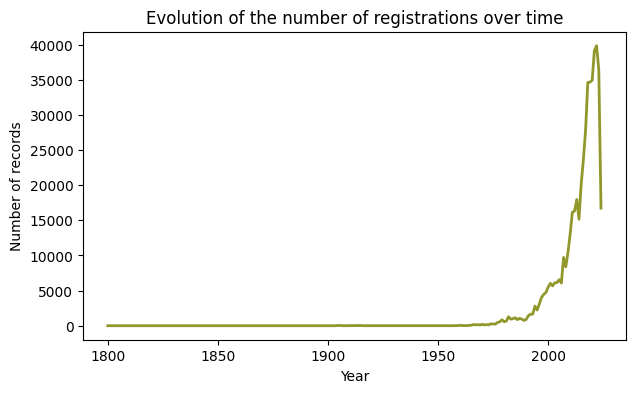

In [74]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(7, 4))

ax.plot(records_year['year'], records_year['records'], linewidth=2, color='#91972A')
ax.set_title('Evolution of the number of registrations over time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of records')
ax.yaxis.get_major_formatter().set_scientific(False)

# Mostrar el gráfico
plt.show()

## Periodo temporal acorde con los variables independientes

In [75]:
data_bufonidae = df_without_nulls_v1.loc[
    (df_without_nulls_v1['year'] >= 1981) & (df_without_nulls_v1['year'] <= 2010)
]
data_bufonidae = data_bufonidae.sort_values('year')

In [76]:
data_bufonidae.head(2)

,gbifID,FAMILY,GENUS,species,infraspecificEpithet,taxonRank,S_NAME,name,countryCode,locality,...,day,month,year,occurrenceStatus,basisOfRecord,recordedBy,issue,len_dec_lat,len_dec_lon,date
344924,2885262432,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Bufo bufo (Linnaeus, 1758)",Common Toad,DK,NaN,...,7.0,5,1981,PRESENT,HUMAN_OBSERVATION,Gribskov Kommune,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,6,6,1981-05-01
400374,3120553391,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Bufo bufo (Linnaeus, 1758)",Common Toad,CH,NaN,...,5.0,4,1981,PRESENT,HUMAN_OBSERVATION,Knapp Noldi,TAXON_MATCH_TAXON_ID_IGNORED,5,5,1981-04-01


In [77]:
data_bufonidae.tail(2)

,gbifID,FAMILY,GENUS,species,infraspecificEpithet,taxonRank,S_NAME,name,countryCode,locality,...,day,month,year,occurrenceStatus,basisOfRecord,recordedBy,issue,len_dec_lat,len_dec_lon,date
42907,2894683929,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Bufo bufo (Linnaeus, 1758)",Common Toad,DK,NaN,...,22.0,4,2010,PRESENT,HUMAN_OBSERVATION,Aalborg Kommune,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,6,6,2010-04-01
42911,2888549084,Bufonidae,Bufo,Bufo bufo,NaN,SPECIES,"Bufo bufo (Linnaeus, 1758)",Common Toad,DK,NaN,...,17.0,4,2010,PRESENT,HUMAN_OBSERVATION,Aalborg Kommune,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...,6,6,2010-04-01


In [78]:
#data_bufonidae.to_csv('01_PREPROCESADO/df_Bufoniade_Tax_Time_Ok.csv', index=False, encoding='utf-8-sig')

In [79]:
print('Número de registros presentes en el dataframe antes de aplicar el filtro temporal acorde a los datos climaticos:', len(df_without_nulls_v1))
print('Número de registros presentes en el dataframe despues de aplicar el filtro temporal acorde a los datos climaticos:', len(data_bufonidae))

antes = len(df_without_nulls_v1)
despues = len(data_bufonidae)
dif = antes-despues
print('Número total de registros descartados:', dif)

Número de registros presentes en el dataframe antes de aplicar el filtro temporal acorde a los datos climaticos: 497804
Número de registros presentes en el dataframe despues de aplicar el filtro temporal acorde a los datos climaticos: 119268
Número total de registros descartados: 378536


# Evaluación de registros duplicados

In [80]:
dataframe_bufonidae = data_bufonidae.copy()  # Crear una copia del DataFrame
dataframe_bufonidae.columns

Index(['gbifID', 'FAMILY', 'GENUS', 'species', 'infraspecificEpithet',
       'taxonRank', 'S_NAME', 'name', 'countryCode', 'locality',
       'stateProvince', 'decimalLatitude', 'decimalLongitude',
       'coordinatePrecision', 'eventDate', 'day', 'month', 'year',
       'occurrenceStatus', 'basisOfRecord', 'recordedBy', 'issue',
       'len_dec_lat', 'len_dec_lon', 'date'],
      dtype='object')

In [81]:
campos = ('gbifID', 'FAMILY', 'GENUS', 'species','taxonRank', 'S_NAME', 'name',
          'countryCode', 'decimalLatitude','decimalLongitude', 
          'eventDate', 'day', 'month', 'year', 'date',
          'basisOfRecord', 'recordedBy')

dataframe_bufonidae = dataframe_bufonidae[list(campos)]

In [82]:
# Se redondea las columnas de latitud y longitud a 4 decimales
dataframe_bufonidae['rounded_lat'] = dataframe_bufonidae['decimalLatitude'].round(4)
dataframe_bufonidae['rounded_lon'] = dataframe_bufonidae['decimalLongitude'].round(4)

# Se crea una nueva columna para la combinación de nombre de especie, fecha y ubicación redondeada
dataframe_bufonidae['species_date_location'] = dataframe_bufonidae['species'] + '_' + dataframe_bufonidae['eventDate'].astype(str) + '_' + dataframe_bufonidae['recordedBy'].astype(str) + '_' + dataframe_bufonidae['rounded_lat'].astype(str) + '_' + dataframe_bufonidae['rounded_lon'].astype(str)

In [83]:
# Buscar duplicados basados en la columna 'species_date_location'
duplicates = dataframe_bufonidae[dataframe_bufonidae.duplicated(subset='species_date_location', keep=False)]
duplicates.shape[0]

45486

In [84]:
# Eliminar los duplicados del DataFrame basados en la columna 'species_date_location'
dataframe_bufonidae_clean = dataframe_bufonidae.drop_duplicates(subset='species_date_location')

In [85]:
print('Número de registros presentes en el dataframe antes de eliminar duplicados:', len(dataframe_bufonidae))
print('Número de registros presentes en el dataframe después de eliminar duplicados:', len(dataframe_bufonidae_clean))

antes = len(dataframe_bufonidae)
despues = len(dataframe_bufonidae_clean)
dif = antes-despues
print('Número total de registros descartados:', dif)

Número de registros presentes en el dataframe antes de eliminar duplicados: 119268
Número de registros presentes en el dataframe después de eliminar duplicados: 86832
Número total de registros descartados: 32436


In [86]:
dataframe_bufonidae_clean.to_csv('01_PREPROCESADO/Data_Bufonidae_EU_processed.csv', index=False, encoding='utf-8-sig')